# Project: Wrangling and Analyze Data

By: Hassan Almaghrabi

In [1]:
# Importing the needed libraries

import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

## Data Gathering

### 1. WeRateDogs Twitter Archive data

In [2]:
# Reading the csv file into a dataframe called (twitter_archive), and show first five rows 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. image_predictions data

In [3]:
# geting the image_predictions.tsv file using the requests library
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [4]:
type(response.content)

bytes

The returned response frome the requests libarary is of bytes type, so we need to write  to the file named 'image_predictions.tsv' using python context manager using the write binary mode 'wb'

In [7]:
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [3]:
# Read the (TSV) file into dataframe called (image_predictions)
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Twitter API data

In [13]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Fail
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success
294

Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
1064: 741067306818797568
Success
10

Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
13

Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
15

Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
18

Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
20

Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
23

In [4]:
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet_id = re.findall(r'"id": (\d*)', line)
        retweet_count = re.findall(r'"retweet_count": (\d*)', line)
        favorite_count = re.findall(r'"favorite_count": (\d*)', line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': tweet_id[0],
                        'retweet_count': retweet_count[0],
                        'favorite_count': favorite_count[0]})
        
twitter_api = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
twitter_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6886,32924
1,892177421306343426,5184,28465
2,891815181378084864,3424,21382
3,891689557279858688,7097,35909
4,891327558926688256,7616,34326


## Assessing Data
By using both visual assessment and programmatic assessement.

In [20]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [27]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [23]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [24]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
image_predictions[image_predictions['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [10]:
image_predictions.query('jpg_url == "https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


In [11]:
twitter_archive.query('tweet_id in ("679158373988876288", "754874841593970688")')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
926,754874841593970688,NaN,NaN,2016-07-18 03:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rubio. He has too much ...,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None
1744,679158373988876288,NaN,NaN,2015-12-22 04:35:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rubio. He has too much skin. 11/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None


In [25]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
tweet_id          2325 non-null object
retweet_count     2325 non-null object
favorite_count    2325 non-null object
dtypes: object(3)
memory usage: 54.6+ KB


### Quality issues
1. `twitter_archive`: Get the content of the anchor element in the "source" column.

2. `twitter_archive`: Some columns data type need to be changed. 

3. `twitter_archive`: Drop any reply tweets, we can find those tweets where the in_reply_to_status_id is not null, then drop the columns related to in_reply_to since there are a lot of missing values in those columns.

4. `twitter_archive`: The retweeted tweets should be removed, besides the columns that related to retweets.

5. `twitter_archive`: The rating_denominator column has other values than 10, for seek of consistency we need to deal with those entries.

6. `twitter_archive`: "expanded_urls" have some rows with missing values, we can drop them since there are only 59 rows.

7. `image_predictions`: There are some duplicated jpg_url, this issue occurs due to the retweeted tweets so we need to drop them.

8. `twitter_api`: The retweet and favorite count data type shall be converted to integer.

### Tidiness issues
1. `twitter_archive`: Last 4 columns shall be combined to be one column called "dog_stage".

2. `image_predictions`: Get the most likely dog breed into a new column.
3. Merege the three dataframes into one dataframe called `df_master`.

## Cleaning Data

In [5]:
# Make copies of original pieces of data
twitter_archive_cleaned = twitter_archive.copy()
image_predictions_cleaned = image_predictions.copy()
twitter_api_cleaned = twitter_api.copy()

## Quality issues

### Issue #1:

#### Define: 
>Get the source of the tweet by untagging the html text in the source column.

#### Code

In [6]:
# get the content of <a> element in "source" coulmn
twitter_archive_cleaned.source = twitter_archive_cleaned.source.apply(lambda x: re.sub('<[^>]*>', '', x))

#### Test

In [7]:
twitter_archive_cleaned.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [8]:
twitter_archive_cleaned[['source']].sample(10)

,source
2079,Twitter for iPhone
238,Twitter for iPhone
504,Twitter for iPhone
843,Twitter for iPhone
957,Twitter for iPhone
2214,Twitter for iPhone
1043,Twitter for iPhone
832,Twitter for iPhone
1201,Vine - Make a Scene
2069,Twitter for iPhone


### Issue #2:

#### Define
>Change the data type of some columns in the `twitter_arcive` to the appropriate data type.

#### Code

In [9]:
twitter_archive_cleaned.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [10]:
# using dictionary to convert specific columns
convert_dict = {'tweet_id': 'str',  # tweet_id to string or (object) since no arithmetic is involved in the id
                'timestamp': 'datetime64'} # timestamp to date time type
 
twitter_archive_cleaned = twitter_archive_cleaned.astype(convert_dict)

#### Test

In [11]:
twitter_archive_cleaned.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Issue #3:

#### Define
>Drop the tweets that is considered as reply in `twitter_arcive`, and drop the columns related to reply tweets.

#### Code

In [13]:
# get the rows that is considered reply by its indices
reply_tweets_idx = twitter_archive_cleaned[~(twitter_archive_cleaned.in_reply_to_user_id.isnull())].index

# Drop the rows
twitter_archive_cleaned.drop(index=reply_tweets_idx, inplace = True)

In [14]:
# Drop the columns
twitter_archive_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [15]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2278 non-null object
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 284.8+ KB


### Issue #4:

#### Define
>Remove the retweeted tweets from `twitter_arcive` and drop any columns related to the retweet.

#### Code

In [16]:
# Drop retweets by its index
twitter_archive_cleaned.drop(twitter_archive_cleaned[twitter_archive_cleaned.text.str[:2] == 'RT'].index, inplace = True)

In [17]:
# Drop the columns
twitter_archive_cleaned.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [18]:
# Get the number of rows 
twitter_archive_cleaned[twitter_archive_cleaned.text.str[:2] == 'RT'].shape[0]

0

In [19]:
for col in twitter_archive_cleaned.columns:
    print(col)

tweet_id
timestamp
source
text
expanded_urls
rating_numerator
rating_denominator
name
doggo
floofer
pupper
puppo


### Issue #5:

#### Define
>Ensure that the rating_denominator has only one value which is 10.

#### Code

In [20]:
# define two functions to extract the rating from the tweet text if it is exists

def get_rating_numerator(txt):
  rating = re.findall(r'\d*/10', txt)

  if rating:
    numerator = rating[0].split('/')[0]
    return int(numerator)

  else:
    return np.NaN


def get_rating_denominator(txt):
  rating = re.findall(r'\d*/10', txt)

  if rating:
    denominator = rating[0].split('/')[1]
    return int(denominator)
  else:
    return np.NaN

In [21]:
# Replace the numerator and denominator in the rows where the denominator not equal to 10 
twitter_archive_cleaned.loc[twitter_archive_cleaned['rating_denominator'] != 10, 'rating_numerator'] = twitter_archive_cleaned['text'].apply(get_rating_numerator)
twitter_archive_cleaned.loc[twitter_archive_cleaned['rating_denominator'] != 10, 'rating_denominator'] = twitter_archive_cleaned['text'].apply(get_rating_denominator)

# Drop any row has NaN in numerator and denominator, which mean the rating does not exists in the tweet text
twitter_archive_cleaned.dropna(subset=['rating_numerator', 'rating_denominator'], inplace=True)

# Making sure the data type of the coulmns is integer
twitter_archive_cleaned[['rating_numerator', 'rating_denominator']] = twitter_archive_cleaned[['rating_numerator', 'rating_denominator']].astype('int64')

#### Test

In [22]:
twitter_archive_cleaned.rating_denominator.value_counts()

10    2083
Name: rating_denominator, dtype: int64

### Issue #6:

#### Define
>Drop the rows that have a missing value in 'expanded_urls' in the `twitter_arcive`.

#### Code

In [23]:
twitter_archive_cleaned['expanded_urls'].isnull().sum()

3

In [24]:
# Drop any row containing a missing value in the "expanded_urls" column
twitter_archive_cleaned.dropna(subset=['expanded_urls'], inplace=True)

#### Test

In [25]:
twitter_archive_cleaned.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #7:

#### Define
>Remove the duplicated rows in the `image_predictions` dataframe.

#### Code

In [26]:
# the duplicated rows will defined using the "jpg_url", and we will keep the first occurrence which is has the id of the original tweets not a retweeted ones

image_predictions_cleaned.drop_duplicates(subset='jpg_url', keep='first', inplace=True)

#### Test

In [27]:
# disply number of duplicated rows
image_predictions_cleaned[image_predictions_cleaned['jpg_url'].duplicated()].shape[0] 

0

### Issue #8:

#### Define
>Convert the retweet and favorite count in `twitter_api` to numerical type.

#### Code

In [28]:
# convert the type by applying pd.to_numeric to the columns

twitter_api_cleaned[['retweet_count', 'favorite_count']] = twitter_api_cleaned[['retweet_count', 'favorite_count']].apply(pd.to_numeric)

#### Test

In [29]:
twitter_api_cleaned.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

## Quality issues

### Issue #1:

#### Define
>Combine the last 4 columns in `twitter_arcive` into one column, then drop them.

#### Code

In [30]:
# we can done the task by using the pandas loc method
twitter_archive_cleaned.loc[twitter_archive_cleaned['doggo'] == 'doggo', 'dog_stage'] = 'doggo'
twitter_archive_cleaned.loc[twitter_archive_cleaned['floofer'] == 'floofer', 'dog_stage'] = 'floofer'
twitter_archive_cleaned.loc[twitter_archive_cleaned['pupper'] == 'pupper', 'dog_stage'] = 'pupper'
twitter_archive_cleaned.loc[twitter_archive_cleaned['puppo'] == 'puppo', 'dog_stage'] = 'puppo'

# any row that have 'None' in all 4 columns will be 'unkown'
twitter_archive_cleaned.loc[
    (twitter_archive_cleaned['doggo'] == 'None') & 
    (twitter_archive_cleaned['floofer'] == 'None') & 
    (twitter_archive_cleaned['pupper'] == 'None') & 
    (twitter_archive_cleaned['puppo'] == 'None'), 
  'dog_stage'] = 'unkown'

# Drop the columns after get the dog stage
twitter_archive_cleaned.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [31]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2080 non-null object
timestamp             2080 non-null datetime64[ns]
source                2080 non-null object
text                  2080 non-null object
expanded_urls         2080 non-null object
rating_numerator      2080 non-null int64
rating_denominator    2080 non-null int64
name                  2080 non-null object
dog_stage             2080 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 162.5+ KB


### Issue #2:

#### Define
>Get the most likely dog breed in `image_predictions`.

#### Code

In [32]:
# if the first prediction is a breed of dog assign the breed to the 'dog_breed_prediction' and its confident to 'prediction_confident' column
image_predictions_cleaned.loc[(image_predictions_cleaned['p1_dog'] == True), 'dog_breed_prediction'] = image_predictions_cleaned['p1']
image_predictions_cleaned.loc[(image_predictions_cleaned['p1_dog'] == True), 'prediction_confident'] = image_predictions_cleaned['p1_conf']

# if the first prediction not a breed but the second prediction is is a breed of dog assign the breed to the 'dog_breed_prediction' and its confident to 'prediction_confident' column
image_predictions_cleaned.loc[(image_predictions_cleaned['p1_dog'] != True) & (image_predictions_cleaned['p2_dog'] == True), 'dog_breed_prediction'] = image_predictions_cleaned['p2']
image_predictions_cleaned.loc[(image_predictions_cleaned['p1_dog'] != True) & (image_predictions_cleaned['p2_dog'] == True), 'prediction_confident'] = image_predictions_cleaned['p2_conf']

# if the first and second predictions are not breeds take the third prdiction label if it is a dog breed and its confident to 'prediction_confident' column
image_predictions_cleaned.loc[(image_predictions_cleaned['p1_dog'] != True) & (image_predictions_cleaned['p2_dog'] != True) & (image_predictions_cleaned['p3_dog'] == True), 'dog_breed_prediction'] = image_predictions_cleaned['p3']
image_predictions_cleaned.loc[(image_predictions_cleaned['p1_dog'] != True) & (image_predictions_cleaned['p2_dog'] != True) & (image_predictions_cleaned['p3_dog'] == True), 'prediction_confident'] = image_predictions_cleaned['p3_conf']

# if none of the three predictions are breeds of dog set the dog_breed_prediction to be 'NDB' --> Not a Dog Breed
image_predictions_cleaned.loc[(image_predictions_cleaned['p1_dog'] != True) & (image_predictions_cleaned['p2_dog'] != True) & (image_predictions_cleaned['p3_dog'] != True), 'dog_breed_prediction'] = 'NDB'
image_predictions_cleaned.loc[(image_predictions_cleaned['p1_dog'] != True) & (image_predictions_cleaned['p2_dog'] != True) & (image_predictions_cleaned['p3_dog'] != True), 'prediction_confident'] = image_predictions_cleaned['p1_conf']

In [33]:
# Drop the columns after get the most likley prediction and it confident
pred_cols = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

image_predictions_cleaned.drop(columns=pred_cols, inplace=True)

#### Test

In [34]:
image_predictions_cleaned.sample(10)

,tweet_id,jpg_url,img_num,dog_breed_prediction,prediction_confident
1126,727524757080539137,https://pbs.twimg.com/media/Chiv6BAW4AAiQvH.jpg,2,Pomeranian,0.958834
401,673689733134946305,https://pbs.twimg.com/media/CVltNgxWEAA5sCJ.jpg,1,Chesapeake_Bay_retriever,0.382220
1121,726887082820554753,https://pbs.twimg.com/media/ChZr8SdWIAAVQKt.jpg,1,soft-coated_wheaten_terrier,0.515919
1919,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676
774,689623661272240129,https://pbs.twimg.com/media/CZIJD2SWIAMJgNI.jpg,1,toy_poodle,0.279604
1976,870308999962521604,https://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg,2,Greater_Swiss_Mountain_dog,0.622752
515,676263575653122048,https://pbs.twimg.com/media/CWKSIfUUYAAiOBO.jpg,1,toy_poodle,0.098029
1386,766069199026450432,https://pbs.twimg.com/media/CqGf3xaXYAEh3ak.jpg,1,redbone,0.484855
671,683111407806746624,https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg,1,cocker_spaniel,0.901392
998,708469915515297792,https://pbs.twimg.com/media/CdT9n7mW0AQcpZU.jpg,1,Chihuahua,0.748163


### Issue #3:

#### Define
>Joining the three dataframes into one dataframe called `df_master`.

#### Code

In [35]:
# Joining the different 3 dataframes

# Make sure that the 'tweet_id' have the same data type in the 3 dataframes
twitter_archive_cleaned['tweet_id'] = twitter_archive_cleaned['tweet_id'].astype('str')
image_predictions_cleaned['tweet_id'] = image_predictions_cleaned['tweet_id'].astype('str')
twitter_api_cleaned['tweet_id'] = twitter_api_cleaned['tweet_id'].astype('str')


df_temp = pd.merge(twitter_archive_cleaned, twitter_api_cleaned, on='tweet_id', how='inner')

df_master = pd.merge(df_temp, image_predictions_cleaned, on='tweet_id', how='inner')

#### Test

In [36]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 0 to 1949
Data columns (total 15 columns):
tweet_id                1950 non-null object
timestamp               1950 non-null datetime64[ns]
source                  1950 non-null object
text                    1950 non-null object
expanded_urls           1950 non-null object
rating_numerator        1950 non-null int64
rating_denominator      1950 non-null int64
name                    1950 non-null object
dog_stage               1950 non-null object
retweet_count           1950 non-null int64
favorite_count          1950 non-null int64
jpg_url                 1950 non-null object
img_num                 1950 non-null int64
dog_breed_prediction    1950 non-null object
prediction_confident    1950 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 243.8+ KB


In [37]:
df_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed_prediction,prediction_confident
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,unkown,6886,32924,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NDB,0.097049
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,unkown,5184,28465,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,unkown,3424,21382,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,unkown,7097,35909,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,unkown,7616,34326,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,unkown,2552,17280,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,unkown,1621,10079,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,unkown,15466,55404,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,unkown,3564,23828,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,5996,27191,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319


## Storing Data

In [38]:
# store the combined data into a csv file
df_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

**Q1: What are the most 5 dog breeds that are predicted by the model and how many distinct breeds are in the dataset?**

In [39]:
# Top 5 dog_breeds in the dataset

# Before get the counts we need to exclued any image predicted as NDB (Not a Dog Breed)
df_master[df_master['dog_breed_prediction'] != 'NDB'].dog_breed_prediction.value_counts().nlargest(5)

golden_retriever      154
Labrador_retriever    100
Pembroke               94
Chihuahua              90
pug                    62
Name: dog_breed_prediction, dtype: int64

In [48]:
# number of unique dog breeds in the data
df_master[df_master['dog_breed_prediction'] != 'NDB'].dog_breed_prediction.nunique()

113

**Q2: What is the most source of tweets in the WeRateDogs twitter archive?**

In [40]:
df_master['source'].value_counts()

Twitter for iPhone    1912
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

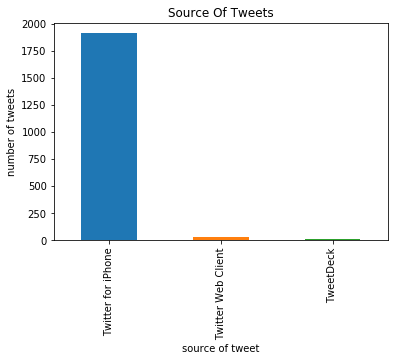

In [46]:
df_master['source'].value_counts().plot(kind='bar')
plt.xlabel('source of tweet')
plt.ylabel('number of tweets')
plt.title('Source Of Tweets')
plt.show()

**Q3: What is the percentage of the number of images in tweets in our dataset?**

In [42]:
df_master.img_num.value_counts()

1    1673
2     188
3      59
4      30
Name: img_num, dtype: int64

Text(0.5,1,'Number Of Images in The Tweets')

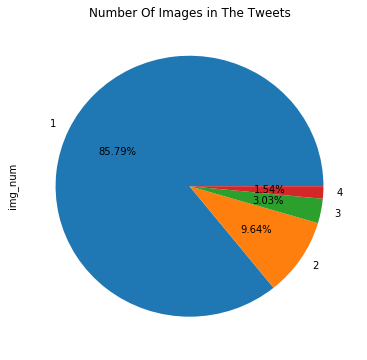

In [47]:
df_master.img_num.value_counts(normalize=True).plot(kind='pie' , autopct='%.2f%%', figsize=(6,6))
plt.title('Number Of Images in The Tweets')

### Insights:
1. There are 113 different dog breeds that are predicted by the deep learning model and the most predicted one is the golden retriever.

2. Most of the tweets in this twitter archive are comes from Twitter for iPhone app.

3. About 86% of the tweets in this archive have only one image.

### Visualization

**Q4: What is the most rating that the dogs get in the dataset?**

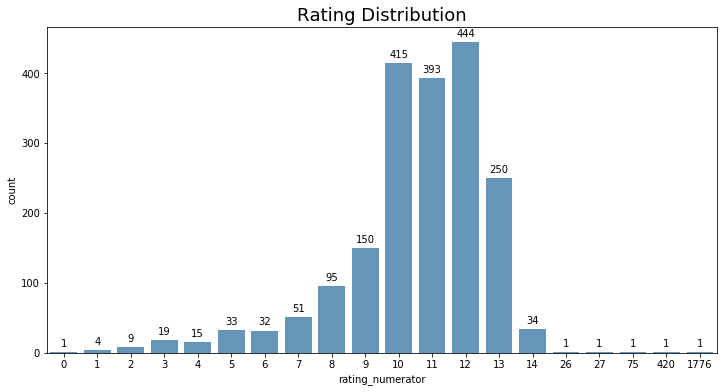

In [44]:
#plot
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(df_master['rating_numerator'], palette=['#5799c6'])
plt.title('Rating Distribution', fontsize=18)

#text labels
for rect in ax.patches:
    height = rect.get_height()
    label = str(height)
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, s=label, ha='center', va='bottom')

The most rating that the dogs get in this twitter archive of WeRateDogs is 12/10.